In [1]:
import os

def count_images_in_folder(folder):
    count = 0
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            count += 1
    return count

train_images_dir = './data/train/images'
valid_images_dir = './data/valid/images'

train_count = count_images_in_folder(train_images_dir) if os.path.exists(train_images_dir) else 0
valid_count = count_images_in_folder(valid_images_dir) if os.path.exists(valid_images_dir) else 0
total_count = train_count + valid_count

print(f"Images in train folder: {train_count}")
print(f"Images in valid folder: {valid_count}")
print(f"Total images combined: {total_count}")


Images in train folder: 64864
Images in valid folder: 6840
Total images combined: 71704


### Import Libraries 
using 20% val and 80% train

In [ ]:
# import os
# import random
# from PIL import Image

# base_dir = './data'      # contains 'train' and 'valid'
# output_dir = './dataset'
# train_dir = os.path.join(output_dir, 'train')
# val_dir = os.path.join(output_dir, 'val')

# emotion_map = {
#     0: 'Angry', 1: 'Contempt', 2: 'Disgust', 3: 'Fear',
#     4: 'Happy', 5: 'Natural', 6: 'Sad', 7: 'Sleepy', 8: 'Surprised'
# }

# # Create folders
# for split_dir in [train_dir, val_dir]:
#     for emotion in emotion_map.values():
#         os.makedirs(os.path.join(split_dir, emotion), exist_ok=True)

# # Step 1: Collect crop metadata (no images loaded)
# crop_metadata = []  # list of tuples: (image_path, bbox, emotion_label, filename)

# for split in ['train', 'valid']:
#     img_dir = os.path.join(base_dir, split, 'images')
#     label_dir = os.path.join(base_dir, split, 'labels')

#     if not os.path.exists(img_dir) or not os.path.exists(label_dir):
#         print(f"⚠️ Missing folder for {split}, skipping...")
#         continue

#     for image_file in os.listdir(img_dir):
#         if not image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
#             continue

#         image_path = os.path.join(img_dir, image_file)
#         label_path = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')

#         if not os.path.exists(label_path):
#             continue

#         try:
#             with Image.open(image_path) as img:
#                 w, h = img.size
#         except Exception as e:
#             print(f"⚠️ Could not open {image_path}: {e}")
#             continue

#         with open(label_path, 'r') as f:
#             lines = f.readlines()

#         for i, line in enumerate(lines):
#             parts = line.strip().split()
#             if len(parts) < 5:
#                 continue

#             class_id = int(parts[0])
#             x_center, y_center, width, height = map(float, parts[1:5])
#             x1 = max(0, int((x_center - width / 2) * w))
#             y1 = max(0, int((y_center - height / 2) * h))
#             x2 = min(w, int((x_center + width / 2) * w))
#             y2 = min(h, int((y_center + height / 2) * h))

#             if x2 <= x1 or y2 <= y1:
#                 print(f"⚠️ Skipping intest crop in {image_file}")
#                 continue

#             emotion_label = emotion_map.get(class_id)
#             if emotion_label:
#                 filename = f"{emotion_label}_{os.path.splitext(image_file)[0]}_{i}.jpg"
#                 crop_metadata.append((image_path, (x1, y1, x2, y2), emotion_label, filename))

# print(f"Collected metadata for {len(crop_metadata)} crops.")

# # Step 2: Shuffle and split metadata
# random.shuffle(crop_metadata)
# split_idx = int(len(crop_metadata) * 0.8)   # split train and test
# train_metadata = crop_metadata[:split_idx]
# val_metadata = crop_metadata[split_idx:]

# print(f"Split into {len(train_metadata)} train and {len(val_metadata)} val crops.")

# # Step 3: Load images, crop, and save on the fly
# def save_crops(metadata_list, save_root):
#     for img_path, bbox, label, fname in metadata_list:
#         try:
#             with Image.open(img_path) as img:
#                 crop_img = img.crop(bbox)
#                 save_path = os.path.join(save_root, label)
#                 os.makedirs(save_path, exist_ok=True)
#                 crop_img.save(os.path.join(save_path, fname))
#         except Exception as e:
#             print(f"❌ Error saving {fname}: {e}")

# save_crops(train_metadata, train_dir)
# save_crops(val_metadata, val_dir)

# print("✅ Dataset prepared:")
# print(f"  Train data: {train_dir}")
# print(f"  validation data: {val_dir}")



⚠️ Skipping intest crop in WIN_20220809_14_39_58_Pro-3-_jpg.rf.77c113533dad9932c1d4e84567958c57.jpg
⚠️ Skipping intest crop in image0008474_jpg.rf.e8aa32f74deb62ccab2990a793668e0a.jpg
⚠️ Skipping intest crop in closed_eye_0745-jpg_face_2_jpg.rf.e04bc2147f93edd71bc4c2ca8d142d59.jpg


### dont use split 

In [2]:
import os
from PIL import Image

base_dir = './data'      # contains 'train' and 'valid'
output_dir = './dataset'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')

emotion_map = {
    0: 'Angry', 1: 'Contempt', 2: 'Disgust', 3: 'Fear',
    4: 'Happy', 5: 'Natural', 6: 'Sad', 7: 'Sleepy', 8: 'Surprised'
}

# Create folders
for split_dir in [train_dir, val_dir]:
    for emotion in emotion_map.values():
        os.makedirs(os.path.join(split_dir, emotion), exist_ok=True)

# Function to collect and save crops for a split
def process_split(split, save_root):
    img_dir = os.path.join(base_dir, split, 'images')
    label_dir = os.path.join(base_dir, split, 'labels')

    if not os.path.exists(img_dir) or not os.path.exists(label_dir):
        print(f"⚠️ Missing folder for {split}, skipping...")
        return

    crop_count = 0

    for image_file in os.listdir(img_dir):
        if not image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        image_path = os.path.join(img_dir, image_file)
        label_path = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')

        if not os.path.exists(label_path):
            continue

        try:
            with Image.open(image_path) as img:
                w, h = img.size
        except Exception as e:
            print(f"⚠️ Could not open {image_path}: {e}")
            continue

        with open(label_path, 'r') as f:
            lines = f.readlines()

        for i, line in enumerate(lines):
            parts = line.strip().split()
            if len(parts) < 5:
                continue

            try:
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:5])
            except ValueError:
                continue

            x1 = max(0, int((x_center - width / 2) * w))
            y1 = max(0, int((y_center - height / 2) * h))
            x2 = min(w, int((x_center + width / 2) * w))
            y2 = min(h, int((y_center + height / 2) * h))

            if x2 <= x1 or y2 <= y1:
                print(f"⚠️ Skipping invalid crop in {image_file}")
                continue

            emotion_label = emotion_map.get(class_id)
            if emotion_label:
                filename = f"{emotion_label}_{os.path.splitext(image_file)[0]}_{i}.jpg"
                save_path = os.path.join(save_root, emotion_label)
                try:
                    with Image.open(image_path) as img:
                        crop_img = img.crop((x1, y1, x2, y2))
                        crop_img.save(os.path.join(save_path, filename))
                        crop_count += 1
                except Exception as e:
                    print(f"❌ Error saving {filename}: {e}")

    print(f"✅ Processed {crop_count} crops for split '{split}'.")

# Process both train and valid folders directly
process_split('train', train_dir)
process_split('valid', val_dir)

print("✅ Dataset folders created:")
print(f"  Train crops saved to: {train_dir}")
print(f"  Validation crops saved to: {val_dir}")


⚠️ Skipping invalid crop in WIN_20220809_14_39_58_Pro-3-_jpg.rf.77c113533dad9932c1d4e84567958c57.jpg
⚠️ Skipping invalid crop in image0008474_jpg.rf.e8aa32f74deb62ccab2990a793668e0a.jpg
⚠️ Skipping invalid crop in closed_eye_0745-jpg_face_2_jpg.rf.e04bc2147f93edd71bc4c2ca8d142d59.jpg
✅ Processed 64861 crops for split 'train'.
✅ Processed 6840 crops for split 'valid'.
✅ Dataset folders created:
  Train crops saved to: ./dataset/train
  Validation crops saved to: ./dataset/val


### want to see how many photo

In [3]:
import os

def count_images(folder):
    total = 0
    for emotion_folder in os.listdir(folder):
        path = os.path.join(folder, emotion_folder)
        if os.path.isdir(path):
            count = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))])
            print(f"{emotion_folder}: {count}")
            total += count
    print(f"Total images in '{folder}': {total}")
    return total

train_dir = './dataset/train'
val_dir = './dataset/val'

print("Counting images in train folder:")
train_total = count_images(train_dir)

print("\nCounting images in validation folder:")
val_total = count_images(val_dir)

print(f"\nOverall total images: {train_total + val_total}")


Counting images in train folder:
Sad: 11969
Fear: 5358
Happy: 13831
Disgust: 4296
Sleepy: 1049
Natural: 5663
Surprised: 8959
Contempt: 2543
Angry: 11193
Total images in './dataset/train': 64861

Counting images in validation folder:
Sad: 1220
Fear: 502
Happy: 1588
Disgust: 412
Sleepy: 142
Natural: 616
Surprised: 950
Contempt: 300
Angry: 1110
Total images in './dataset/val': 6840

Overall total images: 71701


### Define Emotion Classes
-   Map numerical labels to corresponding emotion names.


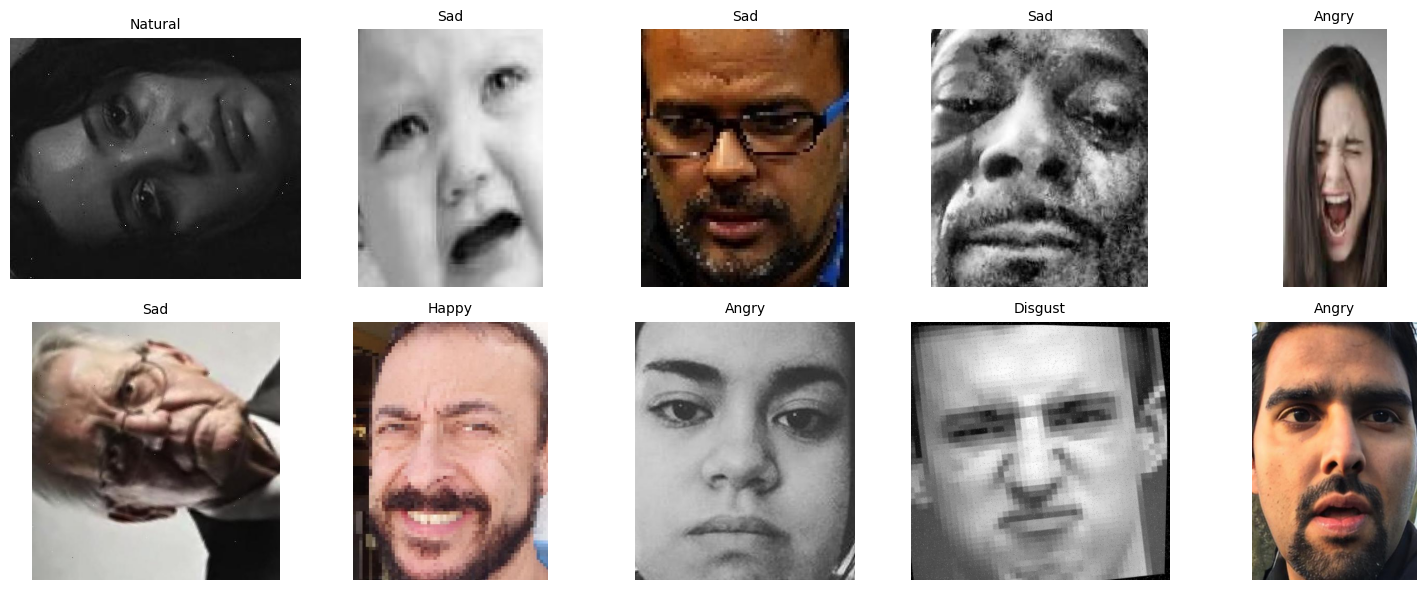

In [4]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directory to load from (train or val)
root_dir = './dataset/train'  # or './dataset/val'

# Step 1: Collect image paths and labels
image_labels = []

for label in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, label)
    if not os.path.isdir(class_dir):
        continue
    for img_file in os.listdir(class_dir):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(class_dir, img_file)
            image_labels.append((image_path, label))

# Step 2: Shuffle and select 10 random images
random.shuffle(image_labels)
sample_images = image_labels[:10]

# Step 3: Display them
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, (image_path, label) in enumerate(sample_images):
    try:
        img = Image.open(image_path).convert("RGB")
        axes[i].imshow(img)
        axes[i].set_title(label, fontsize=10)
        axes[i].axis('off')
    except Exception as e:
        print(f"❌ Error loading {image_path}: {e}")

plt.tight_layout()
plt.show()


### Import Required Libraries for Model Training and Evaluation


In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms, models
from torchvision.models import ResNet18_Weights
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
import numpy as np 
from sklearn.utils.class_weight import compute_class_weight

### Define Configurations and Transforms
-   Dataset directory

-   Image size
    
-   Training and validation transformations using transforms.Compose

In [2]:

# valid = used to evaluate your model during training (for tuning).

# Define the main data directory
# data_dir = r'D:\Project03_emotion\data'
# data_dir = r'./data'
data_dir = r'./dataset'

# Define image size
image_size = 224

# Define data transformations
train_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(p=0.5),              # Flip half of the images horizontally
    transforms.RandomVerticalFlip(p=0.1),                # Some vertical flips to add variance
    transforms.RandomRotation(degrees=15),               # Small rotations for viewpoint variation
    transforms.ColorJitter(brightness=0.3,               # Random brightness changes
                           contrast=0.3, 
                           saturation=0.3, 
                           hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],     # Standard ImageNet normalization
                         std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


### Create Custom Dataset Class
-   Loads images and matching emotion labels from separate folders.

-   Matches image files to label .txt files by filename.

-   Applies optional transforms to images.

-   Returns (image, label) pairs for training.

-   Checks that image and label counts match.

In [3]:
class CustomFacialExpressionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.img_paths = []
        self.labels = []
        self.class_to_idx = self._find_classes()

        for label_name, idx in self.class_to_idx.items():
            label_dir = os.path.join(self.root_dir, label_name)
            for img_file in os.listdir(label_dir):
                if img_file.endswith(('.jpg', '.jpeg', '.png')):
                    self.img_paths.append(os.path.join(label_dir, img_file))
                    self.labels.append(idx)

        print(f"Found {len(self.img_paths)} images in: {self.root_dir}")

    def _find_classes(self):
        # Map folder names to integer labels, e.g., {'Angry': 0, 'Happy': 1, ...}
        classes = sorted(entry.name for entry in os.scandir(self.root_dir) if entry.is_dir())
        return {class_name: idx for idx, class_name in enumerate(classes)}

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

### Set Up Dataset Paths and Create Dataset Instances
-   Specifies paths to training/validation image-label folders and initializes datasets.

In [4]:
# Define paths for train and validation images and labels
train_img_dir = os.path.join(data_dir, 'train', 'images')
train_labels_dir = os.path.join(data_dir, 'train', 'labels')
valid_img_dir = os.path.join(data_dir, 'valid', 'images')
valid_labels_dir = os.path.join(data_dir, 'valid', 'labels')

# Create Custom Datasets
print("Creating Custom Datasets...")
train_dir = os.path.join(data_dir, 'train')   # e.g., ./dataset/train/
val_dir = os.path.join(data_dir, 'val')       # e.g., ./dataset/val/

train_dataset = CustomFacialExpressionDataset(train_dir, transform=train_transforms)
val_dataset = CustomFacialExpressionDataset(val_dir, transform=val_transforms)
print("Custom Datasets created.")


Creating Custom Datasets...
Found 64861 images in: ./dataset/train
Found 6840 images in: ./dataset/val
Custom Datasets created.


### Initialize DataLoaders
-   Creates train_loader and val_loader for batching and shuffling.


In [5]:
# Define class names
class_names = [f'Emotion {i}' for i in range(9)]            # Assuming 9 classes, you can modify this based on your dataset
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

# Create DataLoaders
print("Creating DataLoaders...")
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=6)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=6)
print("DataLoaders created.")


Number of classes: 9
Class names: ['Emotion 0', 'Emotion 1', 'Emotion 2', 'Emotion 3', 'Emotion 4', 'Emotion 5', 'Emotion 6', 'Emotion 7', 'Emotion 8']
Creating DataLoaders...
DataLoaders created.


### Load and Modify Pretrained ResNet-18
-   Load pretrained ResNet-18
-   Freeze most layers
-   Replace final FC layer with nn.Linear(num_ftrs, num_classes)

In [6]:
# Load the pre-trained ResNet-18 model
print("Loading pre-trained ResNet-18 model...")

model = models.resnet18(weights=ResNet18_Weights.DEFAULT)       # ResNet50_Weights.DEFAULT is used to load the pre-trained weights

print("Pre-trained ResNet-18 model loaded.")

# Freeze parameters of all layers except the last fully connected layer
print("Freezing layers except the last fully connected layer...")
for name, param in model.named_parameters():            # fc = final fully connected layer
    if "layer3" in name or "layer4" in name or "fc" in name:
        param.requires_grad = True                      # Faster training, less overfitting.
    else:
        param.requires_grad = False

print("Layers frozen.")

# Modify the last fully connected layer to match the number of classes
print("Modifying the last fully connected layer...")
num_ftrs = model.fc.in_features                     # Last layer input feature size ကို သိမ်းထားတယ်
# model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.BatchNorm1d(128),  # <- helps generalization
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(128, num_classes)
)                                       # Last layer ကို 9-class classifier
print("Last fully connected layer modified.")


Loading pre-trained ResNet-18 model...
Pre-trained ResNet-18 model loaded.
Freezing layers except the last fully connected layer...
Layers frozen.
Modifying the last fully connected layer...
Last fully connected layer modified.


### Define Device, Loss, and Optimizer
-   Loss: CrossEntropyLoss

-   Optimizer: Adam

In [7]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = model.to(device)

# Define the loss function and optimizer
print("Defining loss function and optimizer...")   

# Compute class weights
labels = train_dataset.labels  # Now this is a list of integers
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

# Update loss function
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)                        # use CrossEntropyLoss for multi-class classification
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
print("Loss function and optimizer defined.")



Using device: cpu
Defining loss function and optimizer...
Loss function and optimizer defined.


### Train and Validate the Model with Early Stopping and Learning Rate Scheduling

-   Learning rate scheduler setup using StepLR

-   Early stopping mechanism to prevent overfitting

-   Full training and validation loop:

    -   Forward and backward passes

    -   Accuracy and loss calculation

    -   Evaluation with validation set

    -   Saving the best model

    -   Applying scheduler step

In [9]:
patience=5  # Number of epochs to wait for improvement before reducing learning rate
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=patience)


# Early stopping parameters
                     # Number of epochs to wait for improvement before stopping
best_val_loss = float('inf')        # Validation loss မှာ best ဖြစ်တဲ့ တန်ဖိုးကို သိမ်းထားတယ်။
epochs_no_improve = 0               

# | Epoch | Val Loss | Action                   | `epochs_no_improve` |
# | ----- | -------- | ------------------------ | ------------------- |
# | 1     | 0.50     | Best so far → Save model | 0                   |
# | 2     | 0.48     | Improved → Save model    | 0                   |
# | 3     | 0.48     | Not improved             | 1                   |
# | 4     | 0.52     | Not improved             | 2                   |
# | 5     | 0.53     | Not improved             | 3 → Early Stop!     |


train_losses = []
val_losses = []
# Training loop
num_epochs = 27
print("Starting training loop...")
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}: Training...")
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    train_bar = tqdm(train_loader)
    for inputs, labels in train_bar:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()               # Reset gradients to zero before backward pass

        outputs = model(inputs)             # Forward pass
        loss = criterion(outputs, labels)   # Compute loss
        loss.backward()                     # Backward pass
        optimizer.step()                    # Update weights

        running_loss += loss.item() * inputs.size(0) # Aggregate loss  --> total loss calculation အတွက်


        # count how many predictions were correct --> calculate accuracy
        _, predicted_train = torch.max(outputs.data, 1) 
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        # Predicted: [2, 0, 1]
        # Labels: [2, 1, 1]
        # Matches: [True, False, True] → .sum() = 2

        train_accuracy = 100 * correct_train / total_train

        train_bar.set_postfix({'loss': f'{loss.item():.4f}', 'accuracy': f'{train_accuracy:.2f}%'})

    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    epoch_accuracy_train = 100 * correct_train / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy_train:.2f}%')

    # Validation phase
    print(f"Epoch {epoch+1}/{num_epochs}: Validation...")
    model.eval()
    correct_val = 0
    total_val = 0
    all_preds = []          # Model ရဲ့ prediction တွေစုထားတာ ---> accuracy မလွဲစေဖို့
    all_labels = []         # True labels တွေစုထားတာ ---> accuracy မလွဲစေဖို့
    val_loss = 0.0
    val_bar = tqdm(val_loader)
    with torch.no_grad():
        for inputs, labels in val_bar:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()
            accuracy_val = 100 * correct_val / total_val
            val_bar.set_postfix({'accuracy': f'{accuracy_val:.2f}%'})

            # Collect predictions and labels for confusion matrix
            all_preds.extend(predicted_val.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_accuracy_val = 100 * correct_val / total_val
    epoch_val_loss = val_loss / len(val_dataset)
    val_losses.append(epoch_val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_accuracy_val:.2f}%')

    # Early stopping check and save best model
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'Validation loss improved. Saving model to best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping triggered after {epoch+1} epochs!')
            break

    val_acc = epoch_accuracy_val
    if isinstance(val_acc, torch.Tensor):
        val_acc = val_acc.item()

    scheduler.step(epoch_accuracy_val)


Starting training loop...
Epoch 1/27: Training...


100%|██████████| 1014/1014 [31:38<00:00,  1.87s/it, loss=0.6191, accuracy=56.32%]


Epoch 1/27, Training Loss: 1.1370, Training Accuracy: 56.32%
Epoch 1/27: Validation...


100%|██████████| 214/214 [01:48<00:00,  1.98it/s, accuracy=66.90%]


Epoch 1/27, Validation Loss: 0.8937, Validation Accuracy: 66.90%
Validation loss improved. Saving model to best_model.pth
Epoch 2/27: Training...


100%|██████████| 1014/1014 [32:25<00:00,  1.92s/it, loss=0.9917, accuracy=66.59%]


Epoch 2/27, Training Loss: 0.8675, Training Accuracy: 66.59%
Epoch 2/27: Validation...


100%|██████████| 214/214 [01:59<00:00,  1.80it/s, accuracy=70.41%]


Epoch 2/27, Validation Loss: 0.8210, Validation Accuracy: 70.41%
Validation loss improved. Saving model to best_model.pth
Epoch 3/27: Training...


100%|██████████| 1014/1014 [32:58<00:00,  1.95s/it, loss=0.4757, accuracy=70.36%]


Epoch 3/27, Training Loss: 0.7723, Training Accuracy: 70.36%
Epoch 3/27: Validation...


100%|██████████| 214/214 [01:55<00:00,  1.86it/s, accuracy=73.13%]


Epoch 3/27, Validation Loss: 0.7607, Validation Accuracy: 73.13%
Validation loss improved. Saving model to best_model.pth
Epoch 4/27: Training...


100%|██████████| 1014/1014 [33:21<00:00,  1.97s/it, loss=0.8004, accuracy=72.67%]


Epoch 4/27, Training Loss: 0.7061, Training Accuracy: 72.67%
Epoch 4/27: Validation...


100%|██████████| 214/214 [01:46<00:00,  2.01it/s, accuracy=74.15%]


Epoch 4/27, Validation Loss: 0.7370, Validation Accuracy: 74.15%
Validation loss improved. Saving model to best_model.pth
Epoch 5/27: Training...


100%|██████████| 1014/1014 [32:39<00:00,  1.93s/it, loss=0.4874, accuracy=74.44%]


Epoch 5/27, Training Loss: 0.6598, Training Accuracy: 74.44%
Epoch 5/27: Validation...


100%|██████████| 214/214 [01:58<00:00,  1.81it/s, accuracy=77.11%]


Epoch 5/27, Validation Loss: 0.6587, Validation Accuracy: 77.11%
Validation loss improved. Saving model to best_model.pth
Epoch 6/27: Training...


100%|██████████| 1014/1014 [31:53<00:00,  1.89s/it, loss=0.8775, accuracy=75.82%]


Epoch 6/27, Training Loss: 0.6242, Training Accuracy: 75.82%
Epoch 6/27: Validation...


100%|██████████| 214/214 [01:46<00:00,  2.00it/s, accuracy=77.81%]


Epoch 6/27, Validation Loss: 0.6345, Validation Accuracy: 77.81%
Validation loss improved. Saving model to best_model.pth
Epoch 7/27: Training...


100%|██████████| 1014/1014 [32:46<00:00,  1.94s/it, loss=0.6833, accuracy=76.99%]


Epoch 7/27, Training Loss: 0.5921, Training Accuracy: 76.99%
Epoch 7/27: Validation...


100%|██████████| 214/214 [01:55<00:00,  1.85it/s, accuracy=77.28%]


Epoch 7/27, Validation Loss: 0.6545, Validation Accuracy: 77.28%
Epoch 8/27: Training...


100%|██████████| 1014/1014 [32:16<00:00,  1.91s/it, loss=0.4795, accuracy=78.27%]


Epoch 8/27, Training Loss: 0.5579, Training Accuracy: 78.27%
Epoch 8/27: Validation...


100%|██████████| 214/214 [01:47<00:00,  2.00it/s, accuracy=77.75%]


Epoch 8/27, Validation Loss: 0.6344, Validation Accuracy: 77.75%
Validation loss improved. Saving model to best_model.pth
Epoch 9/27: Training...


100%|██████████| 1014/1014 [31:52<00:00,  1.89s/it, loss=0.6622, accuracy=79.18%]


Epoch 9/27, Training Loss: 0.5317, Training Accuracy: 79.18%
Epoch 9/27: Validation...


100%|██████████| 214/214 [01:46<00:00,  2.00it/s, accuracy=78.13%]


Epoch 9/27, Validation Loss: 0.6528, Validation Accuracy: 78.13%
Epoch 10/27: Training...


100%|██████████| 1014/1014 [31:49<00:00,  1.88s/it, loss=0.5228, accuracy=80.09%]


Epoch 10/27, Training Loss: 0.5088, Training Accuracy: 80.09%
Epoch 10/27: Validation...


100%|██████████| 214/214 [01:46<00:00,  2.01it/s, accuracy=78.83%]


Epoch 10/27, Validation Loss: 0.6051, Validation Accuracy: 78.83%
Validation loss improved. Saving model to best_model.pth
Epoch 11/27: Training...


100%|██████████| 1014/1014 [31:52<00:00,  1.89s/it, loss=0.3645, accuracy=81.03%]


Epoch 11/27, Training Loss: 0.4864, Training Accuracy: 81.03%
Epoch 11/27: Validation...


100%|██████████| 214/214 [01:46<00:00,  2.01it/s, accuracy=80.00%]


Epoch 11/27, Validation Loss: 0.5862, Validation Accuracy: 80.00%
Validation loss improved. Saving model to best_model.pth
Epoch 12/27: Training...


100%|██████████| 1014/1014 [31:44<00:00,  1.88s/it, loss=0.3012, accuracy=81.95%]


Epoch 12/27, Training Loss: 0.4609, Training Accuracy: 81.95%
Epoch 12/27: Validation...


100%|██████████| 214/214 [01:57<00:00,  1.82it/s, accuracy=80.47%]


Epoch 12/27, Validation Loss: 0.5848, Validation Accuracy: 80.47%
Validation loss improved. Saving model to best_model.pth
Epoch 13/27: Training...


100%|██████████| 1014/1014 [33:05<00:00,  1.96s/it, loss=0.7561, accuracy=82.61%]


Epoch 13/27, Training Loss: 0.4482, Training Accuracy: 82.61%
Epoch 13/27: Validation...


100%|██████████| 214/214 [02:00<00:00,  1.78it/s, accuracy=80.94%]


Epoch 13/27, Validation Loss: 0.5605, Validation Accuracy: 80.94%
Validation loss improved. Saving model to best_model.pth
Epoch 14/27: Training...


100%|██████████| 1014/1014 [37:11<00:00,  2.20s/it, loss=0.5357, accuracy=83.36%]


Epoch 14/27, Training Loss: 0.4237, Training Accuracy: 83.36%
Epoch 14/27: Validation...


100%|██████████| 214/214 [01:58<00:00,  1.81it/s, accuracy=80.53%]


Epoch 14/27, Validation Loss: 0.5798, Validation Accuracy: 80.53%
Epoch 15/27: Training...


100%|██████████| 1014/1014 [48:14<00:00,  2.85s/it, loss=0.3820, accuracy=83.99%]   


Epoch 15/27, Training Loss: 0.4064, Training Accuracy: 83.99%
Epoch 15/27: Validation...


100%|██████████| 214/214 [02:08<00:00,  1.66it/s, accuracy=81.75%]


Epoch 15/27, Validation Loss: 0.5755, Validation Accuracy: 81.75%
Epoch 16/27: Training...


100%|██████████| 1014/1014 [36:44<00:00,  2.17s/it, loss=0.5056, accuracy=84.71%]


Epoch 16/27, Training Loss: 0.3898, Training Accuracy: 84.71%
Epoch 16/27: Validation...


100%|██████████| 214/214 [01:59<00:00,  1.79it/s, accuracy=80.20%]


Epoch 16/27, Validation Loss: 0.6214, Validation Accuracy: 80.20%
Epoch 17/27: Training...


100%|██████████| 1014/1014 [35:54<00:00,  2.13s/it, loss=0.2423, accuracy=85.28%]


Epoch 17/27, Training Loss: 0.3738, Training Accuracy: 85.28%
Epoch 17/27: Validation...


100%|██████████| 214/214 [01:59<00:00,  1.79it/s, accuracy=81.81%]


Epoch 17/27, Validation Loss: 0.5915, Validation Accuracy: 81.81%
Epoch 18/27: Training...


100%|██████████| 1014/1014 [35:28<00:00,  2.10s/it, loss=0.1825, accuracy=85.75%]


Epoch 18/27, Training Loss: 0.3623, Training Accuracy: 85.75%
Epoch 18/27: Validation...


100%|██████████| 214/214 [01:59<00:00,  1.79it/s, accuracy=82.22%]

Epoch 18/27, Validation Loss: 0.6017, Validation Accuracy: 82.22%
Early stopping triggered after 18 epochs!


### for compare train loss and val loss

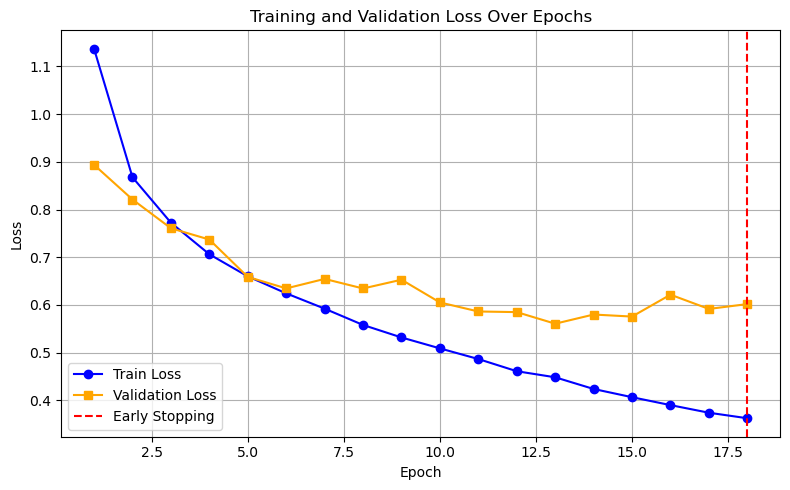

In [ ]:

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 7))  # Bigger figure size

# Plot with larger markers and thicker lines
plt.plot(epochs, train_losses, marker='o', markersize=8, linewidth=2.5,
         linestyle='-', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, marker='s', markersize=8, linewidth=2.5,
         linestyle='-', color='orange', label='Validation Loss')

# Early stopping line
plt.axvline(x=len(train_losses), color='red', linestyle='--', linewidth=2, label='Early Stopping')

# Labels and title with larger font sizes
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', fontsize=16)

# Tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Evaluate Best Model and Visualize Confusion Matrix

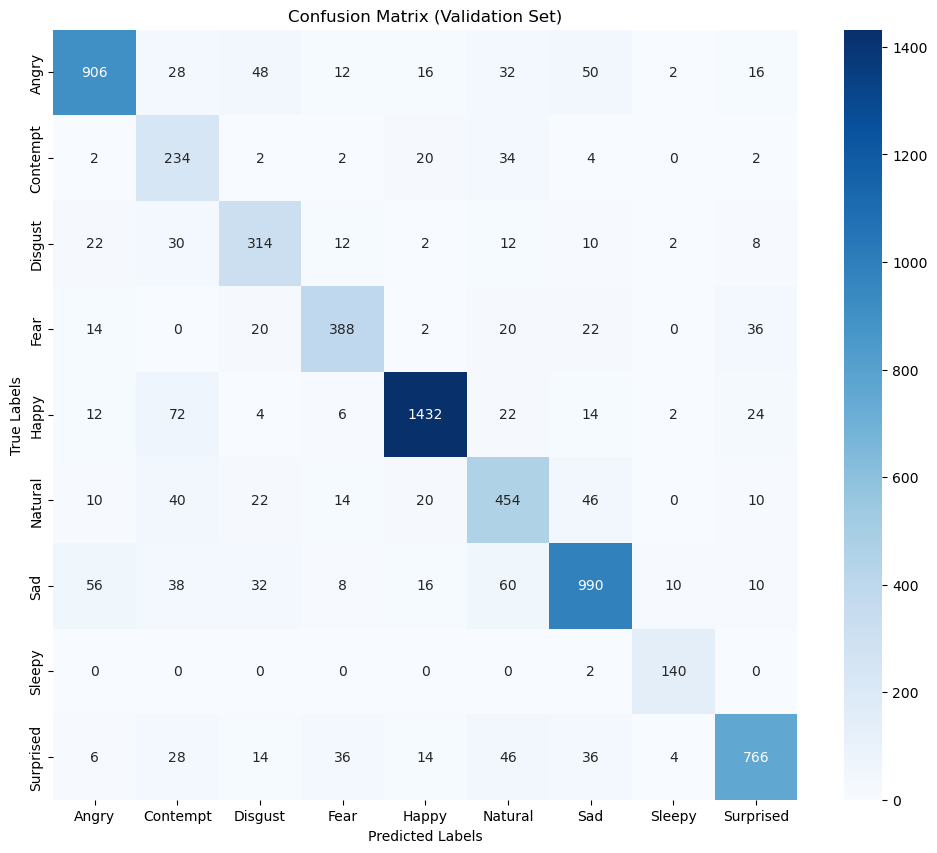

Finished Training and Saving Best Model


In [14]:
# Load the best model
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval()

class_names = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Natural', 'Sad', 'Sleepy', 'Surprised']

# Calculate and visualize the confusion matrix on the validation set
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

print('Finished Training and Saving Best Model')


###  Visualize Random Predictions: True vs Predicted Labels

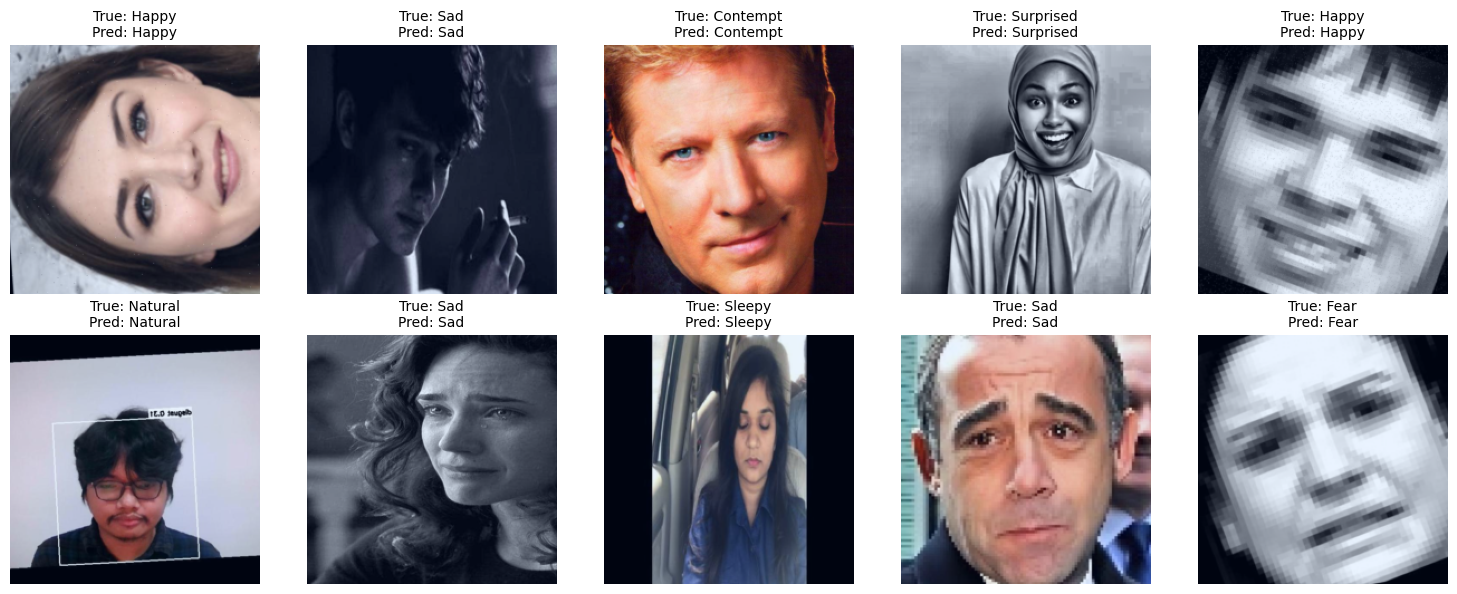

In [ ]:
# Visualize 10 random images with true and predicted labels
def visualize_predictions(model, val_dataset, class_names, num_images=10):      # model က ဘယ်အမျိုးအစားတွေကို မမှန်ခန့်မှန်းတာ ရှင်းလင်းစေဖို့
    plt.figure(figsize=(15, 6))
    indices = random.sample(range(len(val_dataset)), num_images)
    for i, index in enumerate(indices):
        image, true_label = val_dataset[index]
        model.eval()
        with torch.no_grad():
            image = image.unsqueeze(0).to(device)
            output = model(image)
            _, predicted = torch.max(output, 1)
            predicted_label = class_names[predicted.item()]
            true_label_name = class_names[true_label]

        ax = plt.subplot(2, num_images // 2, i + 1)
        image_np = image.cpu().squeeze().permute(1, 2, 0).numpy()
        image_np = (image_np - np.min(image_np)) / (np.max(image_np) - np.min(image_np))
        ax.imshow(image_np)
        ax.set_title(f'True: {true_label_name}\nPred: {predicted_label}', fontsize=10)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(model.to(device), val_dataset, class_names, num_images=10)

### predit with filepath photo

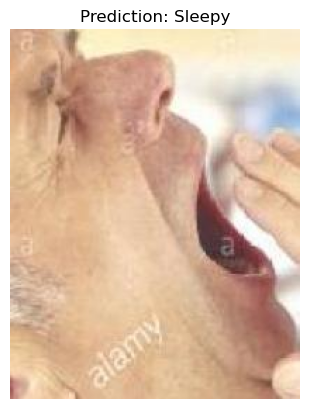

Prediction Probabilities:
Angry: 0.07%
Contempt: 0.06%
Disgust: 0.05%
Fear: 0.01%
Happy: 0.22%
Natural: 0.06%
Sad: 0.18%
Sleepy: 99.32%
Surprised: 0.03%


In [9]:
from torchvision.transforms.functional import to_pil_image

class_names = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Natural', 'Sad', 'Sleepy', 'Surprised']

# --- Test with your own image ---
def predict_image(model, image_path, transform, class_names):
    model.eval()
    
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
    
    # Show image
    plt.imshow(image)
    plt.title(f"Prediction: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

    # Show probabilities
    print("Prediction Probabilities:")
    for i, prob in enumerate(probabilities):
        print(f"{class_names[i]}: {prob.item()*100:.2f}%")

# Load best model weights
model.load_state_dict(torch.load('best_model.pth'))

# ✅ Set your own test image path
my_image_path = r'./dataset/train/Sleepy/Sleepy_193_jpg.rf.5859e7e3cc3a403b77933fd6cedf46f4_0.jpg'  # <-- change this

# Predict using the validation transform
predict_image(model, my_image_path, val_transforms, class_names)


### Real-Time Emotion Detection from Webcam using Trained Model

In [ ]:
import cv2
import torch
from torchvision import transforms, models
import torch.nn as nn
from PIL import Image
import numpy as np

# Define emotion class names
class_names = [
    'Angry',
    'Contempt',
    'Disgust',
    'Fear',
    'Happy',
    'Natural',
    'Sad',
    'Sleepy',
    'Surprised'
]

# Define image size and transform
image_size = 224
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
])

# Load the trained model
num_classes = len(class_names)
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(128, num_classes)
)   

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval().to(device)

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Mirror the frame horizontally
    frame = cv2.flip(frame, 1)

    # Convert frame to PIL image
    img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    input_tensor = transform(img).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted_class = torch.max(output, 1)
        label = class_names[predicted_class.item()]

    # Show predicted label on video
    cv2.putText(frame, f'Emotion: {label}', (20, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow('Emotion Detection', frame)

    # Break on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import FakeData
from torchvision import transforms

# Create a dummy dataset
transform = transforms.ToTensor()
dataset = FakeData(size=100, image_size=(3, 64, 64), num_classes=10, transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=32, num_workers=2)

# Print number of workers
print("Number of workers:", dataloader.num_workers)


Number of workers: 2
